In [2]:
import pandas as pd
import numpy as np

# Practice on decision tree 

Here is a practice on building a simple decision tree, for which pima-indians diabetes data are used. 


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load and trim dataset
data = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
pima = data.loc[9:]
pima = pima.reset_index(drop=True)

In [8]:
display(pima.head())
display(pima.tail())

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
767,1,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [12]:
print(pima.shape)
# there are 8 independent variables and 1 dependent variable (label)
# 768 cases 

(768, 9)


In [21]:
# here we divide dataset into independent variables and label 
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree','skin']
X = pima[feature_cols] 
y = pima.label

print(X)
print(y)

    pregnant  insulin   bmi   age  glucose    bp  pedigree  skin
0          6      0.0  33.6  50.0    148.0  72.0     0.627  35.0
1          1      0.0  26.6  31.0     85.0  66.0     0.351  29.0
2          8      0.0  23.3  32.0    183.0  64.0     0.672   0.0
3          1     94.0  28.1  21.0     89.0  66.0     0.167  23.0
4          0    168.0  43.1  33.0    137.0  40.0     2.288  35.0
..       ...      ...   ...   ...      ...   ...       ...   ...
763       10    180.0  32.9  63.0    101.0  76.0     0.171  48.0
764        2      0.0  36.8  27.0    122.0  70.0     0.340  27.0
765        5    112.0  26.2  30.0    121.0  72.0     0.245  23.0
766        1      0.0  30.1  47.0    126.0  60.0     0.349   0.0
767        1      0.0  30.4  23.0     93.0  70.0     0.315  31.0

[768 rows x 8 columns]
0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: label, Length: 768, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split 
# splitting dataset into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [28]:
print(y_pred)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7056277056277056


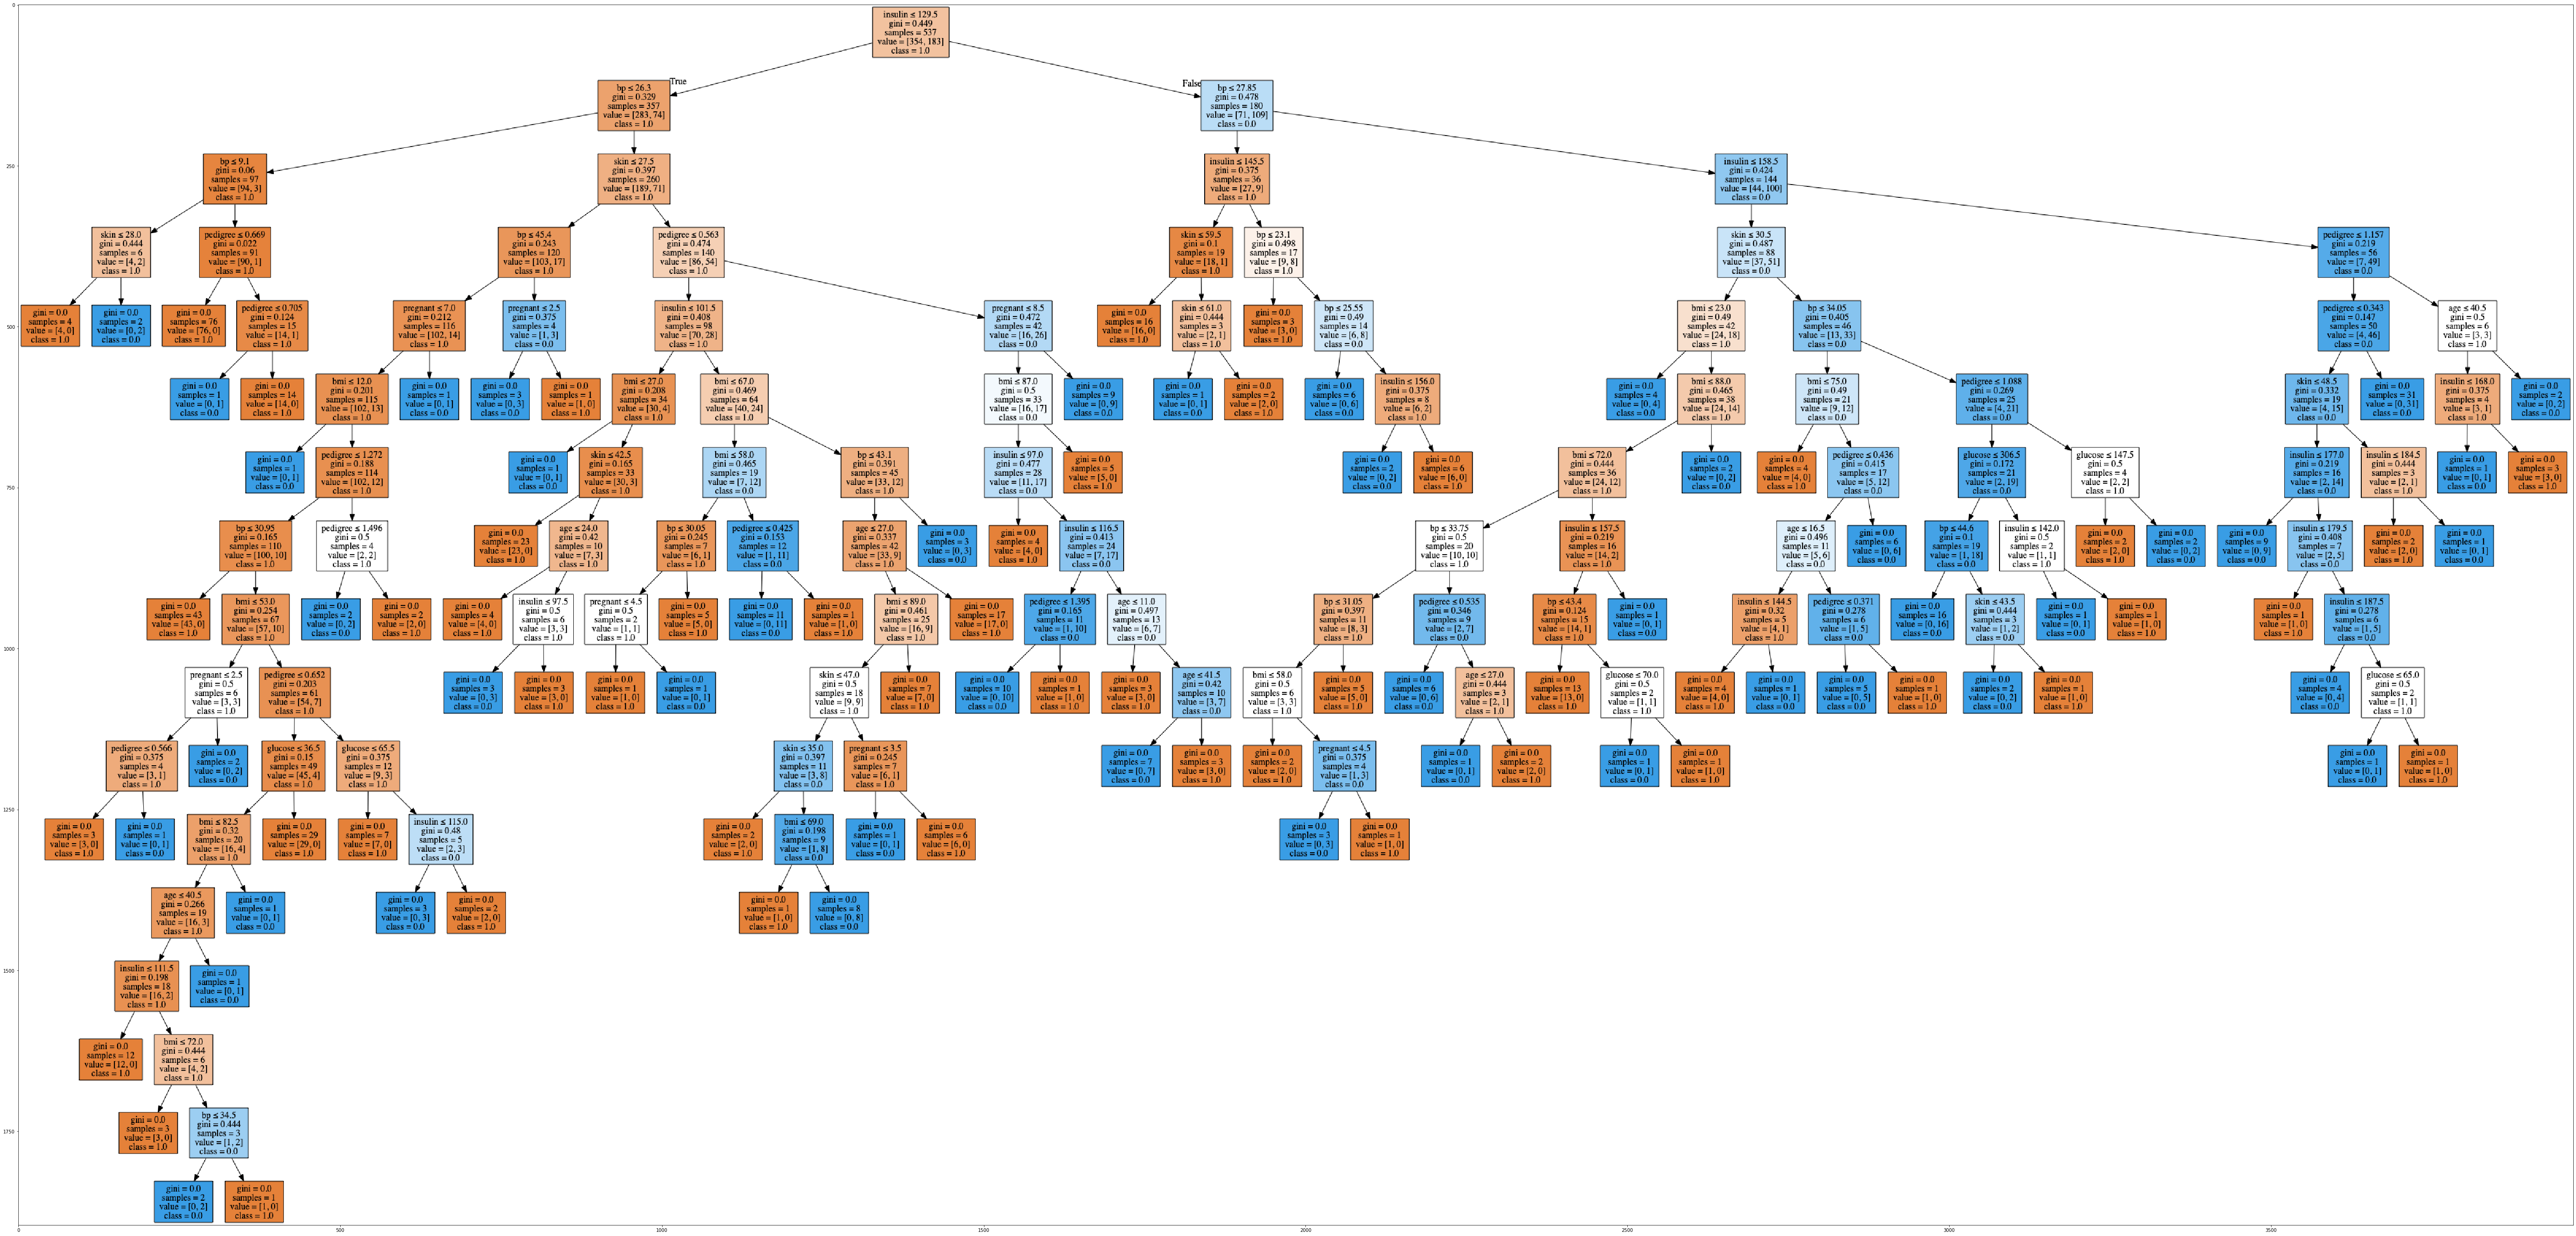

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
%matplotlib inline 

dot_data = StringIO()
filename = "pima.png"
featureNames = pima.columns[0:8]
targetNames = pima["label"].unique().tolist()
l = list(map(str,targetNames))

out=tree.export_graphviz(clf,feature_names=featureNames, out_file=dot_data, class_names= l, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [33]:
print(targetNames)
print(featureNames)

[1.0, 0.0]
Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')
